In [118]:
import numpy as np
import matplotlib.pyplot as plt
import operator
from scipy.special import expit

In [119]:
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum(np.power(vector1-vector2, 2)))
def manhattan_distance(vector1, vector2):
    return np.sum(np.absolute(vector1-vector2))
def cosine_distance(vector1,vector2):
    return np.spatial.distance.cosine(vector1, vector2)

In [120]:
def Calculate_Distance(instance1, instance2,distance_metric):
    distance = 0
    if(distance_metric=='euclidean'):
        distance = euclidean_distance(instance1,instance2)
    elif(distance_metric=='manhattan'):
        distance = np.sum(np.absolute(instance1-instance2))
    elif(distance_metric=='cosine'):
        distance = spatial.distance.cosine(instance1, instance2)
    return distance

In [121]:
def neighbourbasedprediction(X_train, X_test_instance, k,distance_metric,y_train):
    #We get the list of neighbors
    distances = []
    neighbors = []
    for i in range(0, X_train.shape[0]):
        dist = Calculate_Distance(X_train[i], X_test_instance,distance_metric)
        distances.append((i, dist))
    distances.sort(key=operator.itemgetter(1))
    for x in range(k):
        #print distances[x]
        neighbors.append(distances[x][0])
    #We Predict the knn class   
    classVotes = {}
    for i in range(len(neighbors)):
#         print output[i], y_train[output[i]]
        if y_train[neighbors[i]] in classVotes:
            classVotes[y_train[neighbors[i]]] += 1
        else:
            classVotes[y_train[neighbors[i]]] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    #print sortedVotes
    return sortedVotes[0]

In [123]:
def KNN_predict(X_train, X_test, Y_train, Y_test, k,distance_metric):
    output_classes = []
    for i in range(0, X_test.shape[0]):
        predictedClass = neighbourbasedprediction(X_train, X_test[i], k,distance_metric,Y_train)
        output_classes.append(predictedClass)
    return output_classes

In [124]:
def Accuracypredictor(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [125]:
#final_accuracies

In [143]:
import time
k=5

# varry no of features
time_f =[]
for i in range(1,100):
    X_train=np.random.rand(80,i)
    X_test=np.random.rand(20,i)
    classes = ['a', 'b', 'c', 'd']
    y_train= np.random.choice(classes, 80, p=[0.5, 0.1, 0.1, 0.3])
    y_test= np.random.choice(classes, 20, p=[0.5, 0.1, 0.1, 0.3])
    t1 = time.time()
    predicted = KNN_predict(X_train, X_test, y_train, y_test, k, 'euclidean')
    t2 = time.time()
    time_f.append(t2-t1+0.2)

In [103]:
# varry number of train instances
time_d=[]
i = 10
while i <91:
    X_train=np.random.rand(int(0.8*i),5)
    X_test=np.random.rand(int(0.2*i),5)
    classes = ['a', 'b', 'c', 'd']
    y_train= np.random.choice(classes, int(0.8*i), p=[0.5, 0.1, 0.1, 0.3])
    #print(y_train)
    y_test= np.random.choice(classes, int(0.2*i), p=[0.5, 0.1, 0.1, 0.3])
    t1 = time.time()
    predicted = kNN_test(X_train, X_test, y_train, y_test, k, 'euclidean')
    np.set_printoptions(precision=4)
    t2 = time.time()
    time_d.append(t2-t1)
    i = i+10

Text(0,0.5,'time')

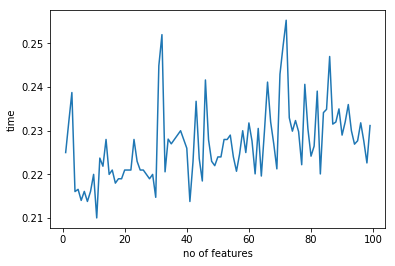

In [144]:
import matplotlib.pyplot as plt

x=np.arange(1,100)
plt.plot(x,time_f)
plt.xlabel('no of features')
plt.ylabel('time')
#time_d

# The pattern isn't shown here

Text(0,0.5,'time')

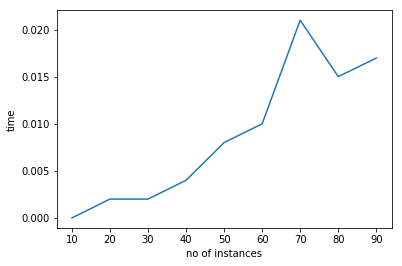

In [105]:
x = [10]*9
for i in range(9):
    x[i] = x[i]*(i+1)
plt.plot(x, time_d)
plt.xlabel('no of instances')
plt.ylabel('time')

# Here , The pattern is roughly followed